In [2]:
# upgrade a library we use midway in the lesson
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


# Matplotlib

Matplotlib is a Python library for plotting data. It integrates with pandas and can display images directly in notebooks. In colaboratory, matplotlib is pre-installed and configured to display charts in-line. In Jupyter notebooks, use:

```
%matplotlib inline
```

In colaboratory we can simply import the library:

In [0]:
import matplotlib.pyplot as plt

The colaboratory comes with an example notebook called "Charting in Colaboratory". There are several examples of matplot lib there. We will show some examples here as well and extend on the pandas tutorial from before. The matplotlib API documentation can be found here:

https://matplotlib.org/api/pyplot_api.html

In [0]:
# data manipulation libraries if needed
import pandas as pd
import numpy as np

# Parts of a plot

Configuring a plot for matplotlib usually involves several function calls from the matplotlib.pyplot library. The order usually goes:

```
  set up figure
  plot data
  configure title, legend etc
  show plot
```

A figure is what a specific image generated by matplotlib is called. Initializing a new figure isn't always required, but it is encouraged. If you don't initialize a new figure, future plots will overwrite each other. The basic plot method plots a line chart:

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

Let's look at this method with a real example and start doing some plotting. First, we need some data. Recall the methods for uploading data (copied below). Download this dataset and upload it to follow along:

https://www.kaggle.com/residentmario/ramen-ratings/data


In [0]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [0]:
upload_files()

In [0]:
# This dataset contains ratings about ramen products
# Here is a brief EDA
ramen_df = pd.read_csv("ramen-ratings.csv")

In [5]:
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [6]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [7]:
ramen_df.Country.value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Poland             4
Holland            4
Dubai              3
Sweden             3
Sarawak            3
Finland            3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

In [8]:
ramen_df.Style.value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [9]:
ramen_df_sorted = ramen_df.sort_values(by="Review #")
ramen_df_sorted.reset_index().head()

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2579,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN
1,2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
2,2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3,2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
4,2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN


In [13]:
# Let's look at Canadian Ramen to start with
ramen_df_sorted = ramen_df.sort_values(by="Review #")
ramen_df_sorted = ramen_df_sorted.reset_index()
canada_ramen_df = ramen_df_sorted.loc[ramen_df_sorted.Country == "Canada" , :]
canada_ramen_df["Stars"] = canada_ramen_df["Stars"].apply(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
canada_ramen_df

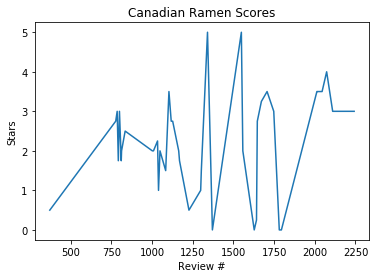

In [12]:
# First, initialize the figure
plt.figure()

# Call the actual plot. The plot method takes the X data points first and
# the Y datapoints second
plt.plot(canada_ramen_df["Review #"], canada_ramen_df["Stars"])

# Here is where you can alter attribute of the plot
plt.title("Canadian Ramen Scores")
plt.xlabel("Review #")
plt.ylabel("Stars")

# Finally, call show to display the plot in line
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


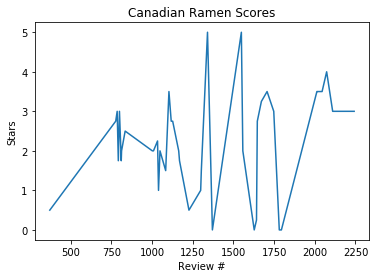

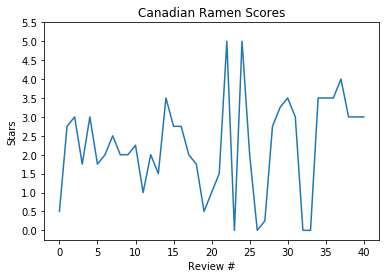

In [14]:
# Let's look at Canadian Ramen to start with
ramen_df_sorted = ramen_df.sort_values(by="Review #")
ramen_df_sorted = ramen_df_sorted.reset_index()
canada_ramen_df = ramen_df_sorted.loc[ramen_df_sorted.Country == "Canada" , :]
canada_ramen_df.loc[:, "Stars"] = canada_ramen_df["Stars"].apply(float)

# Here we plot the Canadian ramen reviews with respect to the review number
# The content here isn't that interesting, instead look at the four main parts
# of plotting

# First, initialize the figure
plt.figure()

# Call the actual plot. The plot method takes the X data points first and
# the Y datapoints second
plt.plot(canada_ramen_df["Review #"], canada_ramen_df["Stars"])

# Here is where you can alter attribute of the plot
plt.title("Canadian Ramen Scores")
plt.xlabel("Review #")
plt.ylabel("Stars")

# Finally, call show to display the plot in line
plt.show()

# if we call figure again we can start the whole plotting process over
# without overriding our first plot
plt.figure()

# Let's make two changes this time
# 1) re-scale the review #s to be relevant to Canada only
# 2) Add more ticks to the y axis
review_order = list(canada_ramen_df["Review #"].reset_index().index)
plt.plot(review_order, canada_ramen_df["Stars"])

plt.title("Canadian Ramen Scores")
plt.xlabel("Review #")
plt.ylabel("Stars")
plt.yticks(np.arange(0, canada_ramen_df["Stars"].max() + 1, 0.5))

plt.show()



# Subplots

What if you wanted to show the two graphs we made above beside each other? Subplots are a handy way of dividing up a figure into multiple plotting areas.

Use the plt.subplot function to divide up a figure into subplot:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

Imagine you are splitting the figure up into a grid. Specify the dimensions of the grid and then specify which cell you are currently plotting into. Indices for cells are numbered from left to right, top to bottom, starting with 1. There are three arguments:

*   nrows - The number of rows to divide the figure up by
*   ncols - The number of cells to divide the figure up by
*   index - The index of the cell to currently plot into


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


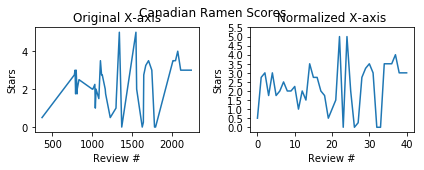

In [18]:
# Repeat the canadian ramen code. We will do the same plots but with subplots 
# this time
ramen_df_sorted = ramen_df.sort_values(by="Review #")
ramen_df_sorted = ramen_df_sorted.reset_index()
canada_ramen_df = ramen_df_sorted.loc[ramen_df_sorted.Country == "Canada" , :]
canada_ramen_df.loc[:, "Stars"] = canada_ramen_df["Stars"].apply(float)

# Notice that we only need to call figure and show once this time
plt.figure()

# select the first subplot
plt.subplot(2, 2, 1)

plt.plot(canada_ramen_df["Review #"], canada_ramen_df["Stars"])
plt.title("Original X-axis")
plt.xlabel("Review #")
plt.ylabel("Stars")
plt.tight_layout()
# select the second subplot
plt.subplot(2, 2, 2)

review_order = list(canada_ramen_df["Review #"].reset_index().index)
plt.plot(review_order, canada_ramen_df["Stars"])

plt.suptitle("Canadian Ramen Scores")
plt.title("Normalized X-axis")
plt.xlabel("Review #")
plt.ylabel("Stars")
plt.yticks(np.arange(0, 6, 0.5))

plt.tight_layout()
plt.show()


# Bar Plots

The bar function is the main powerhouse for making bar graphs (barh if you want them horizontal).

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

The idea is you supply x positions the bars appear at and a height for each bar (value on y axis). Hopefully you remember the groupby lesson from the pandas tutorial because bar graphs are a great way to visualize aggregations by group.

The optional 'bottom' argument can be used to make a stacked bar graph. Here are some examples.

In [19]:
# remove Unrated ramen
ramen_bar_df = ramen_df.copy()
ramen_bar_df = ramen_bar_df.loc[ramen_bar_df["Stars"] != "Unrated" , :]
ramen_bar_df.loc[:, "Stars"] = ramen_bar_df["Stars"].apply(float)

# narrow down to some select countries
country_selection = ramen_bar_df["Country"].isin(["Japan", "Canada", "USA", "China"])
ramen_bar_df = ramen_bar_df.loc[country_selection, :]

# recall groupby from the pandas tutorial
# Lets group by contry and aggregate
country_group = ramen_bar_df.groupby("Country")
avg_group = country_group.mean()
avg_group

,Review #,Stars
Country,,
Canada,1361.512195,2.243902
China,1327.189349,3.421893
Japan,1375.928977,3.981605
USA,1086.730650,3.457043


In [20]:
list(avg_group.index)

['Canada', 'China', 'Japan', 'USA']

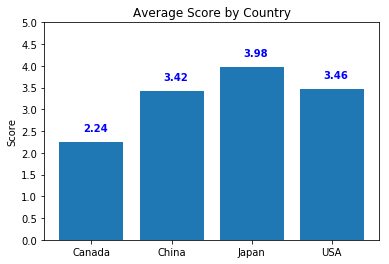

In [23]:
# remove Unrated ramen
ramen_bar_df = ramen_df.copy()
ramen_bar_df = ramen_bar_df.loc[ramen_bar_df["Stars"] != "Unrated" , :]
ramen_bar_df.loc[:, "Stars"] = ramen_bar_df["Stars"].apply(float)

# narrow down to some select countries
country_selection = ramen_bar_df["Country"].isin(["Japan", "Canada", "USA", "China"])
ramen_bar_df = ramen_bar_df.loc[country_selection, :]

# recall groupby from the pandas tutorial
# Lets group by contry and aggregate
country_group = ramen_bar_df.groupby("Country")
avg_group = country_group.mean()

plt.figure()

# bar asks for the left point of each bar and the height of each bar
x_loc = [1, 2, 3, 4]
plt.bar(x_loc, avg_group.Stars)

plt.title("Average Score by Country")
plt.ylabel("Score")
plt.xticks(x_loc, list(avg_group.index))
plt.yticks(np.arange(0, 5.5, 0.5))

# If you want the averages on the bars you have to draw them manually
# Here we loop through the heights and print text above each bar
# the text method plots on the current figure or subplot
i = 0
for v in avg_group.Stars:
    plt.text(i + 0.9, v + .25, f'{v:.2f}', color='blue', fontweight='bold')
    i += 1

plt.show()

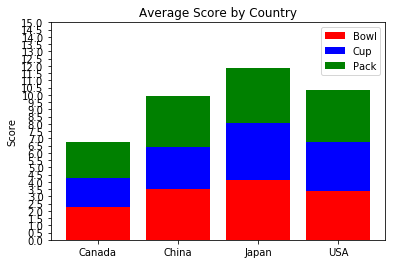

In [24]:
# start with the 'cleaned' dataframe from the last example
# we group by country and style this time, as we want to plot
# the average scores for each style for each country
country_style_avg = ramen_bar_df.groupby(["Country", "Style"]).mean()
country_style_avg_reset = country_style_avg.reset_index()

# From some EDA we identify that the three styles are what we want to plot
# Each style will have its own color.
styles = ["Bowl", "Cup", "Pack"]
colors = ["red", "blue", "green"]

plt.figure()

# bar asks for the left point of each bar and the height of each bar
# the x location doesn't have a meaningful value here so just use 1 to 4
# (4 because we are plotting 4 countries)
x_loc = [1, 2, 3, 4]

# This is where the plotting happens. We plot each style with its own bar call
# The 'top' variable is used to remember what the height of the bar was on
# the last iteration. This concept of iterative plotting could be used for more
# complex stacked bar graphs as well. Also notice that we append what plt.bar
# returns to a list. The object returned by bar stores the 4 rectangle objects
# that the method plots - we need these because the legend plt later will need to
# reference them.
top = None
bars = []
for i, style in enumerate(styles):
    bar_plot = plt.bar(x_loc,
                       country_style_avg_reset.loc[country_style_avg_reset.Style == style, "Stars"],
                       color=colors[i],
                       bottom=top)
    bars.append(bar_plot)
    if i==0:
        top = country_style_avg_reset.loc[country_style_avg_reset.Style == style, "Stars"].reset_index().Stars
    else:
        top += country_style_avg_reset.loc[country_style_avg_reset.Style == style, "Stars"].reset_index().Stars

plt.title("Average Score by Country")
plt.ylabel("Score")
plt.xticks(x_loc, list(country_style_avg.index.levels[0]))
plt.yticks(np.arange(0, 15.5, 0.5))
plt.legend((bars[0], bars[1], bars[2]), styles)

plt.show()

# Take a look at the resulting graph. Is this useful for the type of aggregation
# done?
# Discussion point - What forms of aggregation make stacked bar graphs insightful?


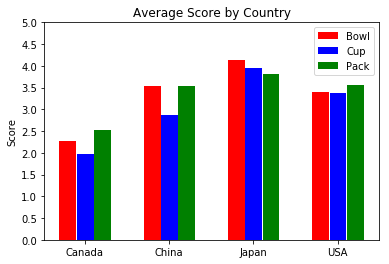

In [25]:
# Repeat the grouping from above
country_style_avg = ramen_bar_df.groupby(["Country", "Style"]).mean()
country_style_avg_reset = country_style_avg.reset_index()

# we are plotting the same styles and colors
styles = ["Bowl", "Cup", "Pack"]
colors = ["red", "blue", "green"]

plt.figure()

# bar asks for the left point of each bar and the height of each bar
x_loc = [1, 3, 5, 7]

# you wil notice that we are plotting the subgroups with their own bar call again
# This time we don't need to remember the top/bottom. We can simply move the x 
# position around some central point. Try playing with different equations in the
# lambda method to see where the bars plot. What is effective for interpretation?
width = 0.4
bars = []
for i, style in enumerate(styles):
    bars.append(plt.bar(list(map(lambda x: x + (i * (width + 0.01)), x_loc)),
                        country_style_avg_reset.loc[country_style_avg_reset.Style == style, "Stars"],
                        color=colors[i],
                        width=width))

plt.title("Average Score by Country")
plt.ylabel("Score")
plt.xticks(list(map(lambda x: x + width, x_loc)), list(country_style_avg.index.levels[0]))
plt.yticks(np.arange(0, 5.5, 0.5))
plt.legend((bars[0], bars[1], bars[2]), styles)

plt.show()

# BONUS: Add text to this bar graph. How would you put text saying the value 
# above each bar?

# Density charts and Histograms

Let's look at other ways to comparing the aggregation results. Means are most useful when your data has a normal distribution. What if it has a different shape? How do we investigate the shape? Let's look at example for plotting the shape of a few of the country's scores.

First let's look at histograms. We can continue using matplotlib for histograms.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


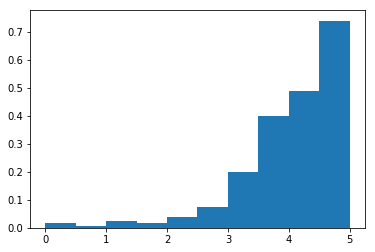

In [27]:
# Lets look at just Japanese ramen
japan_ramen_df = ramen_bar_df.loc[ramen_bar_df.Country == "Japan", :]

# how many bins should the data be bucketed into?
num_bins = 10

plt.figure()

# Requires two arguments - the numerical data, the number of bins
# normed lets you normalize the y-axis (like a probability distribution)
# The return values can be used for adding curves or regression lines to 
# the plot
n, bins, patches = plt.hist(japan_ramen_df.Stars, num_bins, normed=True)

plt.show()

# Play around with the num_bins and normed values to get a feel for the shape
# of the data. What insights does this give you? How can a histogram
# benefit analysis?


Density plots are very similar but unfortunately, matplotlib does not have a simple way of making a density plot. Luckily, there is a library called seaborn that sits on top of matplotlib:

https://seaborn.pydata.org/index.html

https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

Seaborn follows some of the same conventions as matplotlib and abstraccts calls to matplotlib. Take a look through their API if you want an easier but less customizable approach to matplotlib.

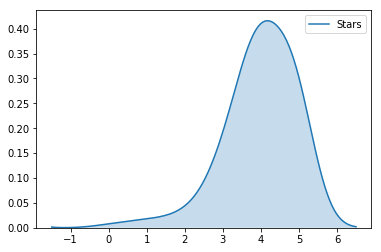

In [32]:
# importing seaborn
import seaborn

plt.figure()

# kdeplot does the density plot
# The first argument is the numerical variable
# bw is the bandwidth - decrease it to fit the data tighter
# shade gives a solid color beneath the line
# try playing with the bw arg and see what happens
seaborn.kdeplot(japan_ramen_df.Stars, bw=0.5, shade=True)

# use matplotlib plt the same way you would before
plt.show()

# You will notice that the density graph is less precise than the histogram
# for this dataset. Its because the data doesn't follow a gaussian distribution
# the actual data has bounds at 0 and 5 but the kdeplot function extrapolates
# to make the resulting graph smooth

# Discussion Points
# What data would be more appropriate for this kind of plot? What value does
# a density plot provide that a histogram doesn't?

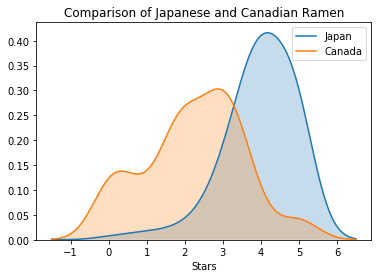

In [35]:
# Remember how we could car bar multiple times to compare different subgroups?
# We can call kdeplot multiple times to compare different data shapes
# let's see how Canadian and Japanese ramen really compare

plt.figure()

canada_ramen_df = ramen_bar_df.loc[ramen_bar_df.Country == "Canada", :]

seaborn.kdeplot(japan_ramen_df.Stars, bw=0.5, shade=True, label="Japan")
seaborn.kdeplot(canada_ramen_df.Stars, bw=0.5, shade=True, label="Canada")

# also notice that you can use the same old matplotlib attributes
# to modify the figure. So you can think of seaborn as an extension
# of matplotlib and not a whole new library you have to learn.
plt.title("Comparison of Japanese and Canadian Ramen")
plt.xlabel("Stars")
plt.legend()

plt.show()

#Box plots and Violin Plots

Matplotlib does have a native way of making boxplots:

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot

As you can see from the documentation they are not easy on the eyes. Again, seaborn saves the
day by making an easy and digestible way for making boxplots.

What is also nice about seaborn is we just have to get the data into a dataframe and point it at the right columns and seaborn will do the heavy lifting.

https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

In [36]:
ramen_bar_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN


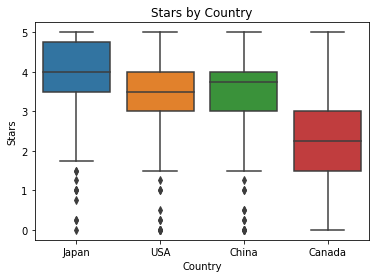

In [38]:

plt.figure()

# for x, point it at the categorical column
# y should be the numerical column
# data is the dataframe the columns exist in
seaborn.boxplot(x="Country", y="Stars", data=ramen_bar_df)

plt.title("Stars by Country")

plt.show()


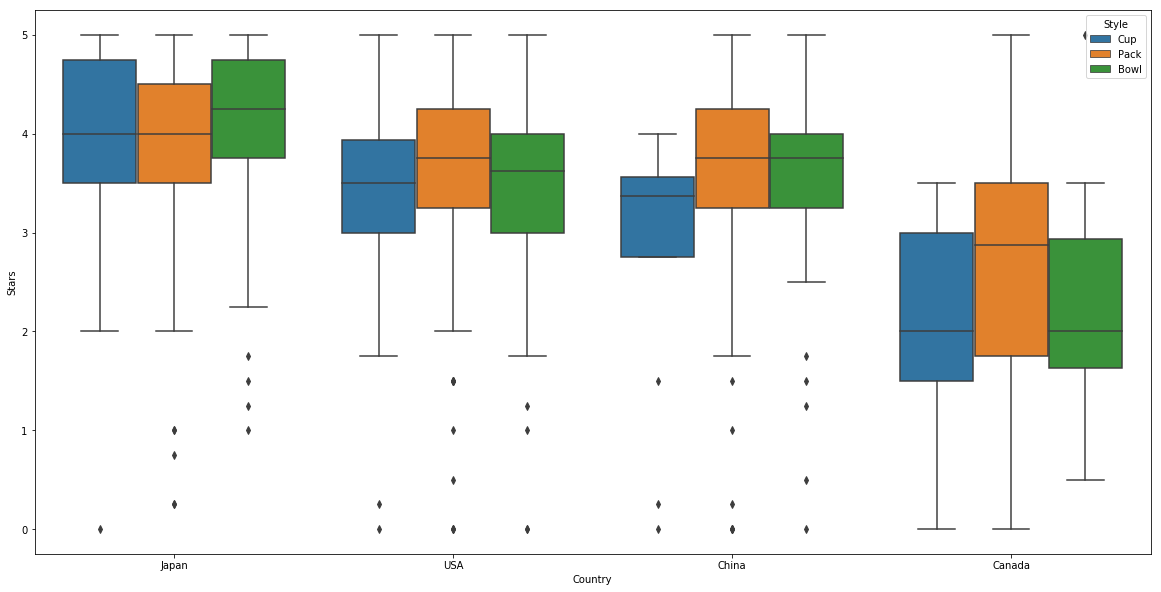

In [39]:
select_styles_df = ramen_bar_df.loc[ramen_bar_df.Style.isin(["Bowl", "Cup", "Pack"]), :]

plt.figure(figsize=(20, 10))

# Hue can be used to introduce a subgroup
seaborn.boxplot(x="Country", y="Stars", hue="Style", data=select_styles_df)

plt.show()

# What short-comings do boxplots have? What shape and amount of data do you think 
# you need for them to be useful?

We have a similar situation for violin plots. There is a matplotlib native function:

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.violinplot

And also a seaborn method that looks a little better:

https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

This method is very similar to the method for boxplots


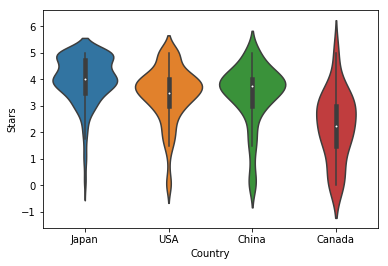

In [40]:
plt.figure()

# for x, point it at the categorical column
# y should be the numerical column
# data is the dataframe the columns exist in
seaborn.violinplot(x="Country", y="Stars", data=ramen_bar_df)

plt.show()

# You will notice that the violin plot has similar problems
# that the density plots have. Violin plots combine aspects
# of the density plot with aspects of the boxplot



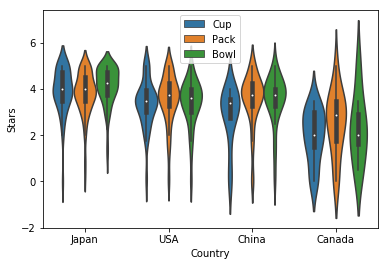

In [41]:
select_styles_df = ramen_bar_df.loc[ramen_bar_df.Style.isin(["Bowl", "Cup", "Pack"]), :]

plt.figure()

# Hue can be used to introduce a subgroup
seaborn.violinplot(x="Country",
                   y="Stars",
                   hue="Style",
                   data=select_styles_df,
                   legend=False)

plt.legend(loc='upper center')
plt.show()

# Discussion point - what is misleading about this graph? What would you
# suggest changing?


#Scatter Plots

For the next kinds of plots we will look at, we will need to load a new dataset. Get the beers.csv file from here:

https://www.kaggle.com/nickhould/craft-cans/data

Upload it.

In [0]:
upload_files()

In [0]:
beer_df = pd.read_csv("beers.csv")

In [43]:
beer_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [44]:
beer_df.describe()

# these are beer products brewed in the US. abv is alcohol content
# and ibu is a measure of bitterness. Let's see if the two have a visual
# relationship.


,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


Seaborn has a really handy function for doing scatterplots.

https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

Let's see how that looks.

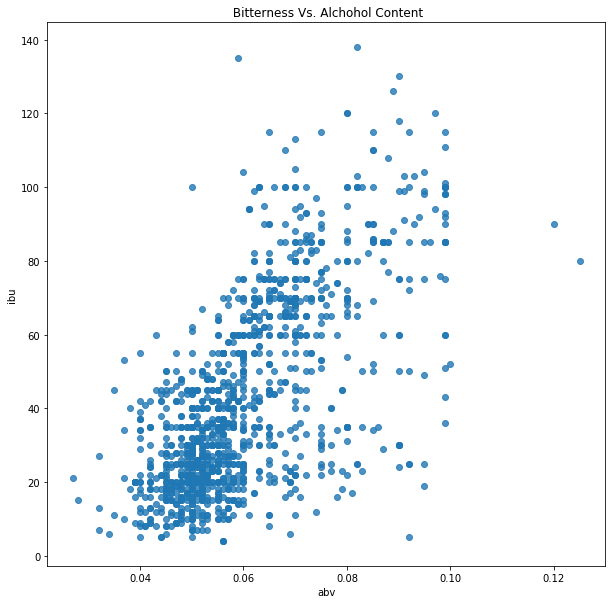

In [45]:
# figure has a fig size argument that you can use to make the figure
# area larger. Feel free to play around with this to find a figure size
# that looks good on your display.
plt.figure(figsize=(10, 10))

# regplot behaves much like the other seaborn methods we have looked at
# fit_reg fits a regression line. Let's look at what this looks like after
seaborn.regplot(x="abv",
                y="ibu",
                data=beer_df,
                fit_reg=False)

plt.title(" Bitterness Vs. Alchohol Content")
plt.show()

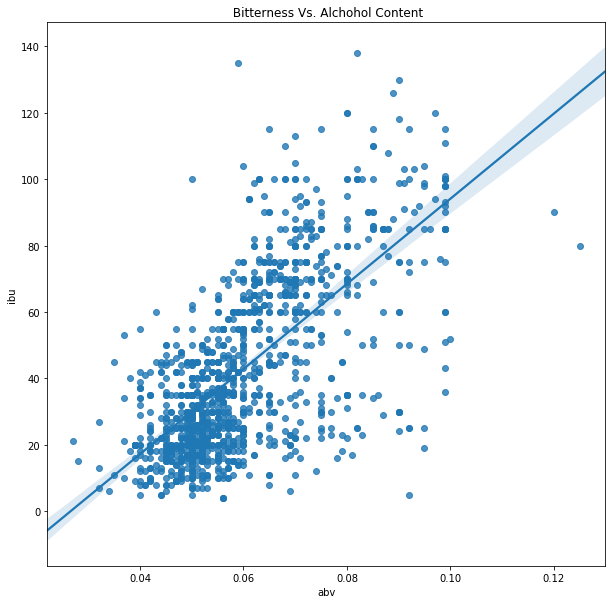

In [46]:
# Let's do it again but with a regression line
plt.figure(figsize=(10,10))

seaborn.regplot(x="abv",
                y="ibu",
                data=beer_df,
                fit_reg=True)

plt.title(" Bitterness Vs. Alchohol Content")
plt.show()

In [0]:

# Bonus - Can you display one of the other dimensions on the scatterplot as well?
# Can any insight be found from visualizing ounces or the beer type?
